# Direct Oral Anticoagulant (DOAC) prescribing during COVID-19

In [114]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

### Count of all people on DOACs by month since January 2019

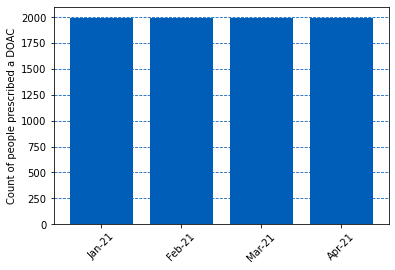

In [115]:
all_df=pd.read_csv("../output/measure_doacs_by_sex.csv", usecols=["date", "on_doac", "population"])
summary_df=all_df.groupby(["date"], as_index=False)["on_doac"].sum()
summary_df["date"] = pd.to_datetime(summary_df["date"])
x1_coordinates=summary_df["date"].dt.strftime('%b-%y')
y1_coordinates=summary_df["on_doac"]
plt.bar(x1_coordinates, y1_coordinates, color='#005EB8', edgecolor='white')
plt.ylabel('Count of people prescribed a DOAC')
plt.gca()
plt.xticks(rotation=45)
plt.legend
plt.grid(axis="y", color="#005EB8", linestyle='dashed')
plt.savefig(f'../output/plot_test2.png')
plt.show() 

In [116]:
# function that plot individual line for each unique demographic
def plot_measure_line(measure_df, demographic_group):
    """
    measure_df: measure file
    demographic: string that indicates what demographic you want to plot
    """
    
    for d in measure_df[demographic_group].unique():
       
        
        df_subset = measure_df[measure_df[demographic_group] == d]
        plt.plot(df_subset['date'], df_subset['on_doac'], label=d)
        
    plt.ylabel('Count of people prescribed a DOAC')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()
    plt.gca().set_ylim(bottom=0)
    plt.grid(color="0.9", linestyle='dashed')
    plt.savefig(f'../output/plot_{demographic_group}.png')
    plt.show()    
    

### Plots by demographics

1. Number of people prescribed a DOAC broken down into age bands

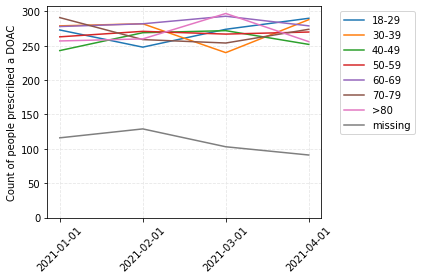

In [117]:
measure_df = pd.read_csv(f'../output/measure_doacs_by_age_band.csv')

plot_measure_line(measure_df, 'age_band')

2. Number of people prescribed a DOAC identified as being a 'caregiver'

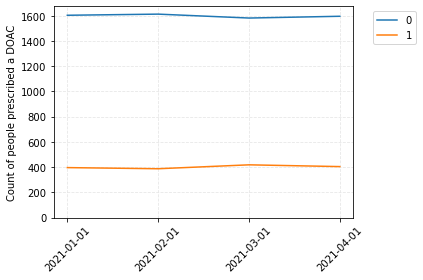

In [118]:
measure_df = pd.read_csv(f'../output/measure_doacs_by_carer.csv')

plot_measure_line(measure_df, 'carer')

3. Number of people prescribed a DOAC by region

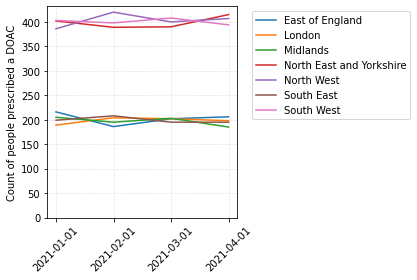

In [119]:
measure_df = pd.read_csv(f'../output/measure_doacs_by_region.csv')

plot_measure_line(measure_df, 'region')

4. Number of people prescribed a DOAC by sex

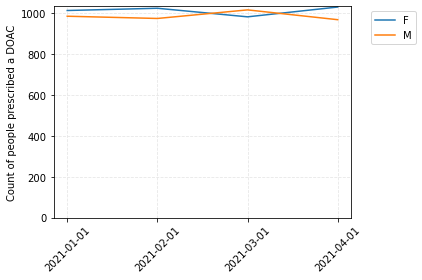

In [120]:
measure_df = pd.read_csv(f'../output/measure_doacs_by_sex.csv')

plot_measure_line(measure_df, 'sex')